# Imports

In [319]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df = pd.read_csv('./final.csv', index_col=0, parse_dates=['Date'])

In [321]:
test = df[df['Date'].isin(pd.date_range(start='2023-09-08', end='2023-10-07', freq='D'))]
train = df.drop(index=test.index)
X = train.drop(columns = ['time_stamp_x', 'time_stamp_y', 'time', 'Date', 'price_increase'])
y = train['price_increase']
X_train, X_validation, y_train, y_validation = train_test_split(X, y , test_size = 0.25, random_state=42)
X_test = test.drop(columns = ['time_stamp_x', 'time_stamp_y', 'time', 'Date', 'price_increase'])
y_test = test['price_increase']

In [322]:
X_train

,difficulty,hash,Open,High,Low,Close,Adj Close,Volume,gold_open,gold_high,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
1538,3.739542e+11,3.116285e+09,144.783844,146.635284,141.288040,146.635284,146.635284,110870747,1805.800049,1808.099976,...,1.127205,1.129995,1.129995,0.0,4535.410156,4542.879883,4470.390137,4477.439941,4477.439941,4.401970e+09
331,7.008476e+10,5.840396e+08,100.836998,111.272003,99.308502,107.109001,107.109001,35911700,1222.400024,1232.300049,...,1.154361,1.155135,1.155135,0.0,2763.830078,2775.989990,2749.030029,2750.790039,2750.790039,3.327160e+09
194,5.258514e+10,4.382095e+08,154.563004,159.169006,154.307007,155.520996,155.520996,35146100,1301.000000,1306.800049,...,1.164293,1.166725,1.166725,0.0,2720.979980,2722.500000,2700.679932,2705.270020,2705.270020,4.241100e+09
322,6.914119e+10,5.761766e+08,114.915001,115.295998,113.406998,115.070000,115.070000,22917000,1201.199951,1201.199951,...,1.151808,0.000000,0.000000,0.0,2885.570068,2885.570068,2885.570068,0.000000,0.000000,3.340820e+09
266,5.209380e+10,4.341150e+08,92.175400,96.993202,88.090202,93.618797,93.618797,30488100,1211.099976,1211.099976,...,1.152392,0.000000,0.000000,0.0,2833.280029,2833.280029,2833.280029,0.000000,0.000000,3.265590e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,3.362985e+11,2.802488e+09,143.962677,154.597076,136.682800,154.370529,154.370529,158306034,1807.400024,1807.400024,...,1.037958,0.000000,0.000000,0.0,4023.889893,4023.889893,4023.889893,0.000000,0.000000,5.183340e+09
1095,1.886188e+11,1.571823e+09,119.198914,125.506172,117.823441,125.430389,125.430389,727842488,1888.400024,1888.400024,...,1.184553,1.185944,1.185944,0.0,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4.812180e+09
1130,2.045574e+11,1.704645e+09,146.251495,157.488800,143.911545,156.173126,156.173126,1085861192,1882.199951,1882.199951,...,1.216604,1.223691,1.223691,0.0,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,4.053310e+09
1294,2.993359e+11,2.494466e+09,309.497406,310.881622,268.866943,287.463715,287.463715,403964500,1869.300049,1895.500000,...,1.210551,1.213301,1.213301,0.0,4206.049805,4233.450195,4206.049805,4229.890137,4229.890137,4.139790e+09


In [323]:
X_test

,difficulty,hash,Open,High,Low,Close,Adj Close,Volume,gold_open,gold_high,...,euro_usd_low,euro_usd_close,euro_usd_adj_close,euro_usd_volume,sp500_open,sp500_high,sp500_low,sp500_close,sp500_adj_close,sp500_volume
2120,2.584050e+11,2.153375e+09,143.257370,144.124344,140.928955,143.886154,143.886154,46927009,1924.000000,1924.699951,...,1.069507,1.069782,1.069782,0.0,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3.259290e+09
2121,2.552395e+11,2.126995e+09,143.895950,144.001816,142.324234,143.406815,143.406815,35896666,1918.400024,1918.400024,...,1.069782,0.000000,0.000000,0.0,4457.490234,4457.490234,4457.490234,0.000000,0.000000,3.259290e+09
2122,2.817297e+11,2.347748e+09,143.409027,143.792282,141.827194,142.894440,142.894440,33705148,0.000000,0.000000,...,0.000000,1.071811,1.071811,0.0,0.000000,0.000000,0.000000,4480.979980,4480.979980,3.259290e+09
2123,2.506443e+11,2.088703e+09,142.890076,143.619995,138.178223,139.930466,139.930466,58031716,1923.000000,1928.300049,...,1.071146,1.071811,1.071811,0.0,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3.369920e+09
2124,2.762070e+11,2.301725e+09,139.932358,142.853256,139.286240,140.804672,140.804672,57433672,1920.800049,1920.800049,...,1.070618,1.075038,1.075038,0.0,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3.435740e+09
2125,2.631465e+11,2.192887e+09,140.806717,144.639084,140.553345,143.115967,143.115967,54374646,1910.300049,1914.599976,...,1.071742,1.075327,1.075327,0.0,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3.529430e+09
2126,2.633620e+11,2.194684e+09,143.118500,147.058807,142.308243,146.329483,146.329483,44084896,1903.000000,1910.000000,...,1.065507,1.073422,1.073422,0.0,4487.779785,4511.990234,4478.689941,4505.100098,4505.100098,3.648720e+09
2127,2.665832e+11,2.221527e+09,146.358139,149.150711,146.358139,147.350723,147.350723,57280169,1923.500000,1927.300049,...,1.063468,1.063717,1.063717,0.0,4497.979980,4497.979980,4447.209961,4450.319824,4450.319824,6.932230e+09
2128,2.545838e+11,2.121531e+09,147.357681,148.031113,144.276459,144.624649,144.624649,34872985,1923.699951,1923.699951,...,1.063717,0.000000,0.000000,0.0,4450.319824,4450.319824,4450.319824,0.000000,0.000000,6.932230e+09
2129,2.644548e+11,2.203790e+09,144.599152,146.145874,143.445023,145.797852,145.797852,31255846,0.000000,0.000000,...,0.000000,1.066826,1.066826,0.0,0.000000,0.000000,0.000000,4445.129883,4445.129883,6.932230e+09


In [324]:
final = Pipeline([
    ('scaler' , StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear',
                              max_iter=100000000,
                              penalty='l2',
                              C=1e-1,
                              warm_start=False
                              ))
    ])
final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.1, max_iter=100000000,
                                    solver='liblinear'))])

In [325]:
y_pred = final.predict(X_test)

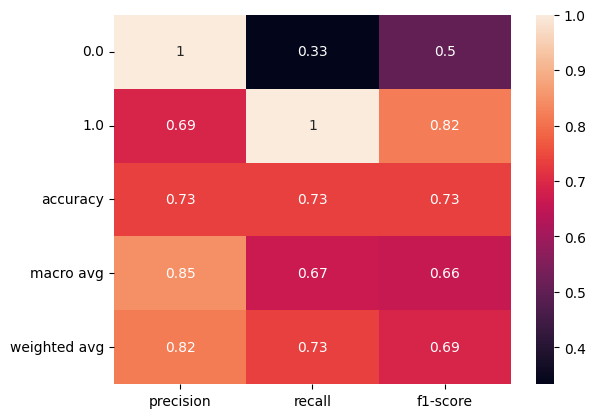

In [333]:
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True);

In [327]:
f1_score(y_test, y_pred, average='weighted')

0.6909090909090909

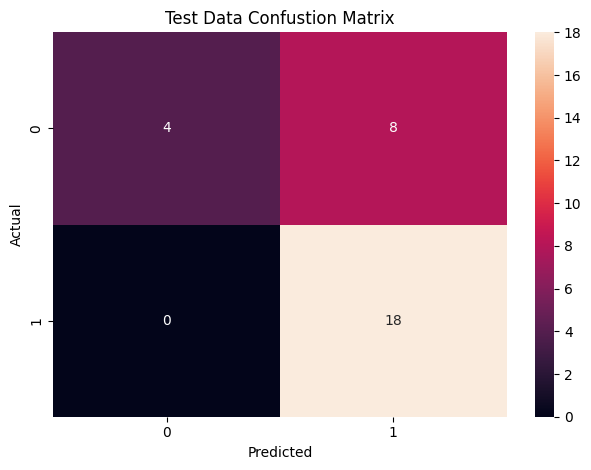

In [335]:
fig, ax = plt.subplots()


cdf = pd.DataFrame(confusion_matrix(y_test, y_pred))
cdf.index.name = 'Actual'
cdf.columns.name = 'Predicted'
sns.heatmap(cdf, ax=ax, annot=True)
ax.set_title(f"Test Data Confustion Matrix")

plt.tight_layout()